### Prerequests

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://github.com/prayagpadwal/Adidas-Sales-Analysis/raw/refs/heads/main/Adidas%20US%20Sales%20Datasets.xlsx'
df = pd.read_excel(url)
df.head()

# Ignore warnings from seaborn
import warnings
warnings.filterwarnings("ignore")
# Set style for plots
sns.set(style="whitegrid")

### Line Plot

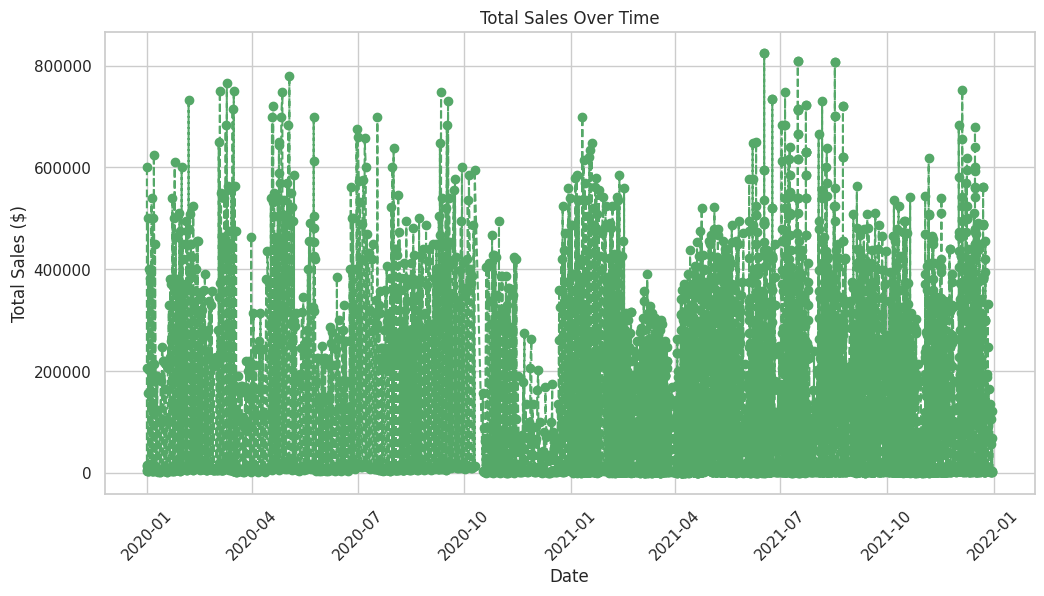

In [12]:
df_sorted = df.sort_values(by="Invoice Date") 
plt.figure(figsize=(12, 6))
plt.plot(df_sorted["Invoice Date"], df_sorted["Total Sales"], marker="o", linestyle="--", color="g")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales Over Time")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### Bar Charts

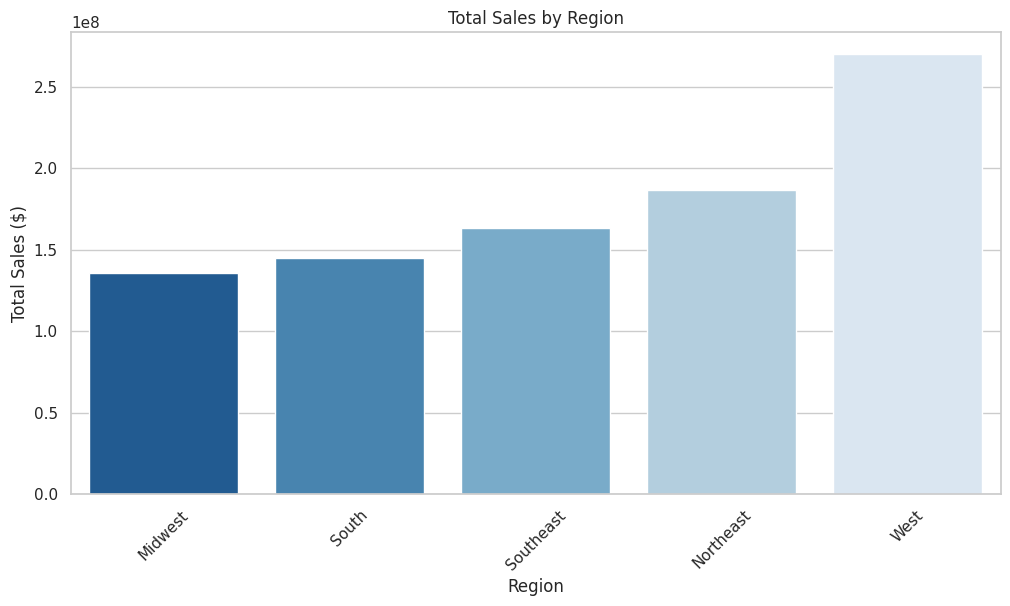

In [13]:
plt.figure(figsize=(12, 6))
region_sales = df.groupby("Region")["Total Sales"].sum().sort_values()
sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_r")
plt.xlabel("Region")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales by Region")
plt.xticks(rotation=45)
plt.show()

### Histograms

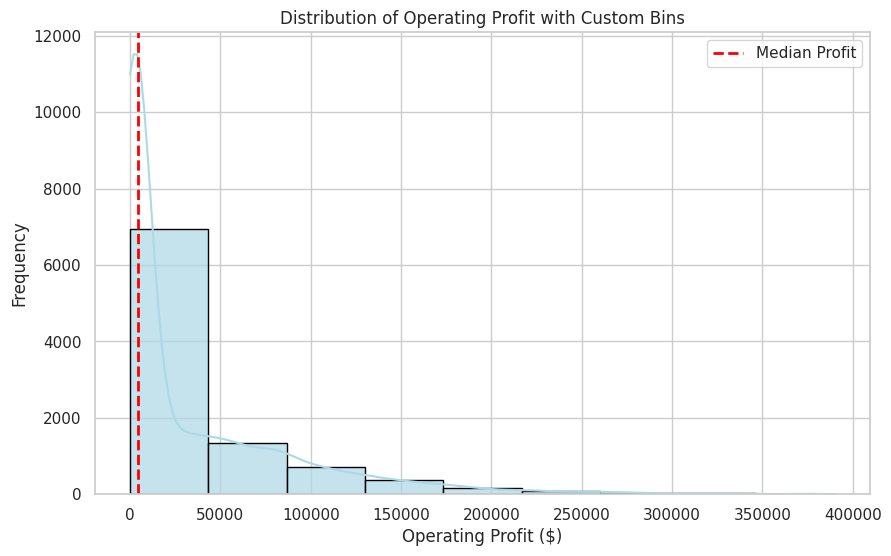

In [14]:
plt.figure(figsize=(10, 6))
profit_bins = np.linspace(df["Operating Profit"].min(), df["Operating Profit"].max(), 10)
sns.histplot(df["Operating Profit"], bins=profit_bins, kde=True, color="lightblue", edgecolor="black", alpha=0.7)
plt.axvline(df["Operating Profit"].median(), color='red', linestyle='dashed', linewidth=2, label='Median Profit')
plt.xlabel("Operating Profit ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Operating Profit with Custom Bins")
plt.legend()
plt.show()

### Stacked Bar Charts

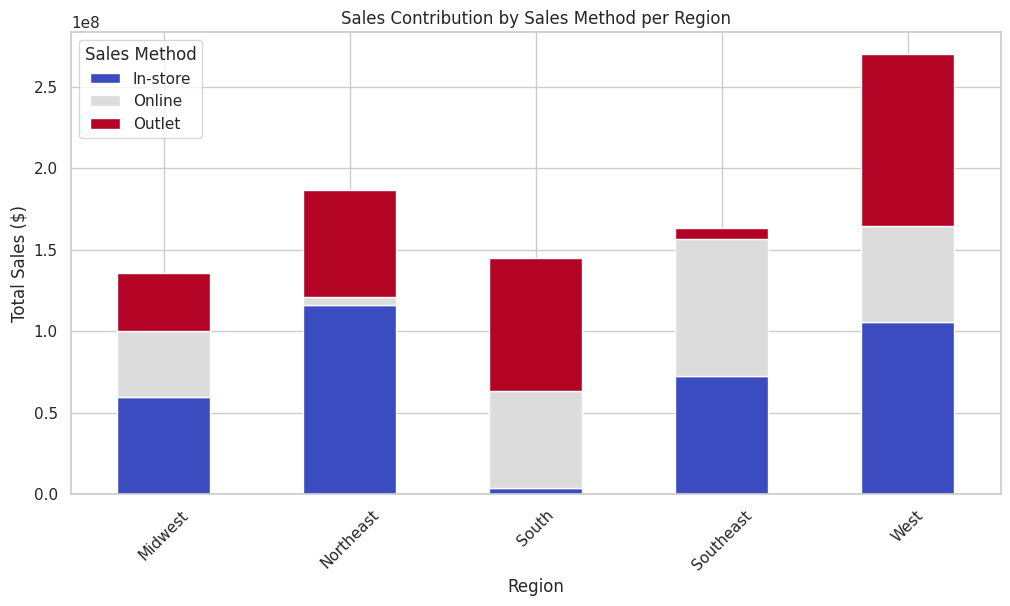

In [15]:
df_grouped = df.groupby(["Region", "Sales Method"])["Total Sales"].sum().unstack()
df_grouped.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.xlabel("Region")
plt.ylabel("Total Sales ($)")
plt.title("Sales Contribution by Sales Method per Region")
plt.xticks(rotation=45)
plt.legend(title="Sales Method")
plt.show()

### Heatmaps

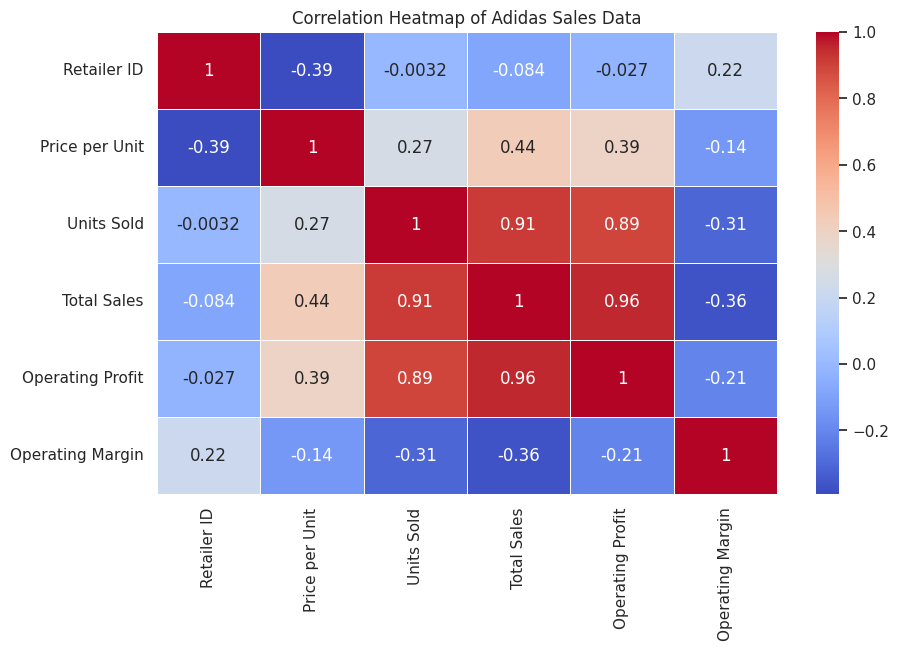

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Adidas Sales Data")
plt.show()

### Pie Charts

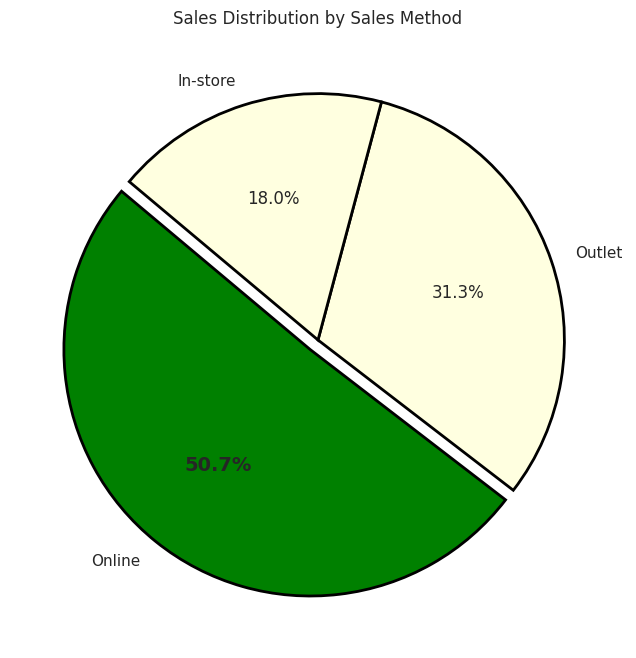

In [35]:
sales_method_counts = df["Sales Method"].value_counts()
largest_idx = sales_method_counts.idxmax()  # Get the index of the largest category

colors = ["green" if label == largest_idx else "lightyellow" for label in sales_method_counts.index]

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sales_method_counts,
    labels=sales_method_counts.index,
    autopct="%1.1f%%",
    colors=colors,
    startangle=140,
    wedgeprops={"linewidth": 2, "edgecolor": "black"},  # Bold outline for all slices
    explode=(0.05, 0, 0),  # Explode the largest segment
)

# Make the largest segment's text bold
for i, autotext in enumerate(autotexts):
    if sales_method_counts.index[i] == largest_idx:
        autotext.set_fontweight("bold")
        autotext.set_fontsize(14)

plt.title("Sales Distribution by Sales Method")
plt.show()


### Scatter Plots

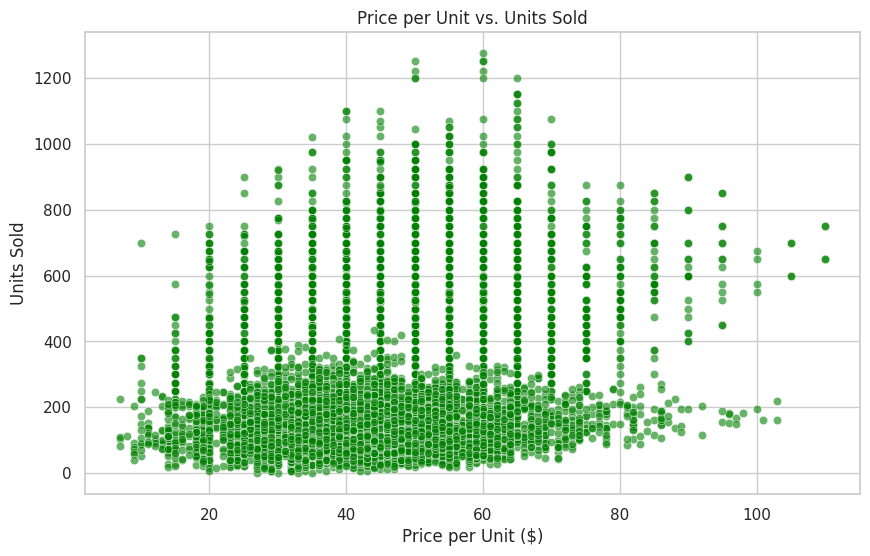

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Price per Unit"], y=df["Units Sold"], alpha=0.6, color="green")
plt.xlabel("Price per Unit ($)")
plt.ylabel("Units Sold")
plt.title("Price per Unit vs. Units Sold")
plt.show()

### Stack Plots

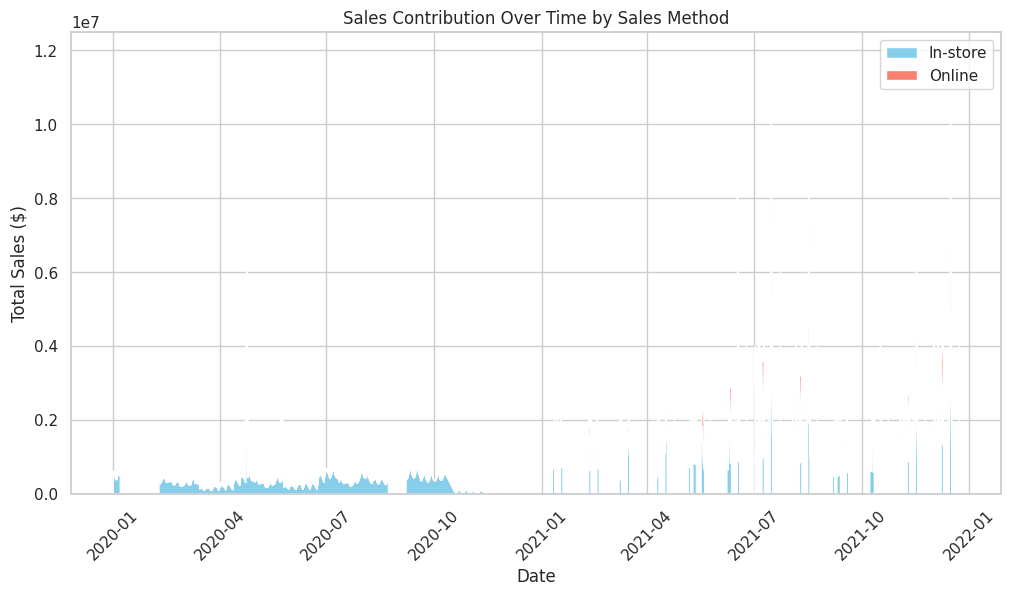

In [19]:
df_grouped_time = df.groupby(["Invoice Date", "Sales Method"])["Total Sales"].sum().unstack()
plt.figure(figsize=(12, 6))
plt.stackplot(df_grouped_time.index, df_grouped_time["In-store"], df_grouped_time["Online"], labels=["In-store", "Online"], colors=["skyblue", "salmon"])
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.title("Sales Contribution Over Time by Sales Method")
plt.legend()
plt.xticks(rotation=45)
plt.show()

